### Imports

In [2]:
# project
import importlib
import lasso
# 3P
import numpy as np
import matplotlib.pyplot as plt
from time import time as tm
%matplotlib inline

### Generate Data

In [3]:
n=50
d=200

np.random.seed(170)
X = np.random.rand(n,d)
np.random.seed(200)
w = np.random.rand(d,1)
np.random.seed(402)
y = np.dot(X,w)+np.random.rand(n,1)
Lambda = 10

Q = 1/2*np.eye(n)
A = np.vstack((X.T , -X.T))
p = y
b = Lambda * np.ones((2*d,1))
x0 = 0*np.ones((n,1))

### Tests

In [17]:
eps = 1e-6
importlib.reload(lasso)
mus = [2, 5, 10, 15, 30, 50, 100]
objectifs = {}
ve = {}
tim = {}

In [18]:
for mu in mus:
    beg = tm()
    solver = lasso.SolveQP(Q, p, A, b, mu, eps)
    solver.fit()
    end = tm()
    tim[mu] = end - beg
    objectif = np.array(solver.objectif).reshape(-1)
    print("mu: ", mu, "| objectif:", objectif[-1])
    objectif = objectif - objectif[-1]
    objectifs[mu] = objectif
    ve[mu] = solver.optimal_v[-1]

mu:  2 | objectif: -990.8932294660514
mu:  5 | objectif: -942.0479088547976
mu:  10 | objectif: -942.0477654726881
mu:  15 | objectif: -942.0475748088119
mu:  30 | objectif: -942.0471281579252
mu:  50 | objectif: -942.046178054581
mu:  100 | objectif: -942.0427470216617


### Plot

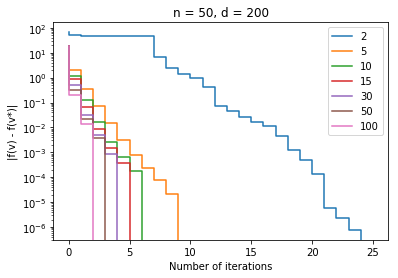

In [19]:
plt.yscale('log')
plt.xlabel("Number of iterations")
plt.ylabel("|f(v) - f(v*)|")
plt.title("n = 50, d = 200")
for mu in mus:
    plt.step(range(len(objectifs[mu])), objectifs[mu])
plt.legend(mus)
plt.savefig("../report/n50d200.png")

### Comparaison of $\omega$ and $\omega^*$

In [20]:
we = {}
for mu in mus:
    we[mu] = np.dot(np.linalg.pinv(X),ve[mu] + y)

In [21]:
from tabulate import tabulate
values = []
for mu in mus:
    difference = np.abs(we[mu] - w)
    values.append([mu, np.max(difference), np.min(difference), np.mean(difference), np.std(difference)])
print("|w - w*|")
print(tabulate(values, headers=["mu", "max", "min", "mean", "std"]))

|w - w*|
  mu       max          min      mean       std
----  --------  -----------  --------  --------
   2  0.752091  0.000125268  0.232393  0.146155
   5  0.710387  9.12551e-06  0.226946  0.147418
  10  0.710324  0.000629409  0.22694   0.147423
  15  0.710287  0.00106743   0.226936  0.147426
  30  0.710242  0.00172296   0.22693   0.147431
  50  0.710175  0.00265872   0.226922  0.14744
 100  0.710001  0.00430558   0.22692   0.147441


### comparison of execution time

In [22]:
for mu in mus:
    print("mu =", mu, ": ", round(tim[mu], 2), "s")

mu = 2 :  14.19 s
mu = 5 :  17.24 s
mu = 10 :  10.6 s
mu = 15 :  9.01 s
mu = 30 :  7.75 s
mu = 50 :  6.26 s
mu = 100 :  5.06 s
